# Connect to Wandb

In [25]:
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [26]:
api = wandb.Api()

In [27]:
entity, project = "msci_project", "final_model_eval"  # set to your entity and project 
runs = api.runs(entity + "/" + project) 

In [100]:
for run in runs:
    print(type(run.config['final_config_dict']['seed']))
    break

<class 'int'>


In [101]:
model_runs = {}
ignored_models = ['BPR', 'LightGCN', 'MultiDAE']

for run in runs:
    if 'baseline' in run.tags:
        model = run.config['model']
        seed = run.config['final_config_dict']['seed']
        if model not in ignored_models and seed == 2020: # Don't use this model for now
            model_runs[model] = run

model_runs['Ours (MultVAE)'] = model_runs.pop('Diffusion')
model_runs['Ours (MacridVAE)'] = model_runs.pop('MacridDiffusion')
            
'''model_runs = {}
for run in final_runs:
    if run in model_runs
    model_runs

md_runs = []
for run in runs:
    if run.config['model'] == 'MacridDiffusion':
        md_runs.append(run)'''

"model_runs = {}\nfor run in final_runs:\n    if run in model_runs\n    model_runs\n\nmd_runs = []\nfor run in runs:\n    if run.config['model'] == 'MacridDiffusion':\n        md_runs.append(run)"

In [173]:
def get_run_info(history):

    valid_df = history.loc[history['train_step'].isna()]

    ndcg = valid_df['valid/ndcg@10']
    step = np.arange(len(ndcg))

    timestamp = valid_df['_timestamp']
    timestamp = (timestamp - timestamp[1])/(60) # time in minutes

    return step, timestamp, ndcg

for model, run in model_runs.items():
    step, timestamp, ndcg = get_run_info(run.history())
    

In [31]:
for model, run in model_runs.items():
    print(model)

MultiVAE
MacridVAE
Ours (MultVAE)
Ours (MacridVAE)


In [180]:
"""
Broken axis example, where the x-axis will have a portion cut out.
"""

def broken_axis_plot(data, x1, x2, xlabel='', ylabel='', fname=None):

    ax2max = x2
    f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

    for model, xdata, ydata in data:

        x = np.concatenate((xdata[:x1], xdata[x2:]))
        y = np.concatenate((ydata[:x1], ydata[x2:]))

        # plot the same data on both axes
        ax.plot(x, y, linewidth=2, label=model)
        ax2.plot(x, y, linewidth=2, label=model)

        if np.max(x) > ax2max:
            ax2max = np.max(x)
        

        ax.set_xlim(0,x1)
        ax2.set_xlim(x2, np.max(ax2max))

        # hide the spines between ax and ax2
        ax.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)

        ax.yaxis.tick_left()
        ax2.yaxis.tick_left()
        ax.tick_params(labelright=False)   # don't put tick labels at the top
        ax2.yaxis.set_ticks_position('none')

        # This looks pretty good, and was fairly painless, but you can get that
        # cut-out diagonal lines look with just a bit more work. The important
        # thing to know here is that in axes coordinates, which are always
        # between 0-1, spine endpoints are at these locations (0,0), (0,1),
        # (1,0), and (1,1).  Thus, we just need to put the diagonals in the
        # appropriate corners of each of our axes, and so long as we use the
        # right transform and disable clipping.

        d = .015 # how big to make the diagonal lines in axes coordinates
        # arguments to pass plot, just so we don't keep repeating them
        kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
        ax.plot((1-d,1+d), (-d,+d), **kwargs)
        ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

        kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
        ax2.plot((-d,+d), (1-d,1+d), **kwargs)
        ax2.plot((-d,+d), (-d,+d), **kwargs)

        # What's cool about this is that now if we vary the distance between
        # ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
        # the diagonal lines will move accordingly, and stay right at the tips
        # of the spines they are 'breaking'

    f.subplots_adjust(hspace=0)

    # Show legend, grid
    ax2.legend()#bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

    # Set x label
    ax.grid()
    ax2.grid()
    ax.set_ylabel(xlabel)
    ax2.set_xlabel(ylabel)

    plt.show()

    if fname:
        f.savefig(f'{fname}.svg', format='svg', transparent=True)

    plt.clf()

In [181]:


steplist, timestamplist, ndcglist, modellist = [], [], [], []
for model, run in model_runs.items():
    step, timestamp, ndcg = get_run_info(run.history())

    steplist.append(step)
    timestamplist.append(timestamp)
    ndcglist.append(ndcg)
    modellist.append(model)

myorder = [1, 3, 0, 2]
steplist = [steplist[i] for i in myorder]
timestamplist = [timestamplist[i] for i in myorder]
ndcglist = [ndcglist[i] for i in myorder]
modellist = [modellist[i] for i in myorder]

stepdata = zip(modellist, steplist, ndcglist)
macrid_timedata = zip(modellist[:2], timestamplist[:2], ndcglist[:2])
mult_timedata = zip(modellist[2:], timestamplist[2:], ndcglist[2:])

/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_43664/983432903.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = np.concatenate((ydata[:x1], ydata[x2:]))


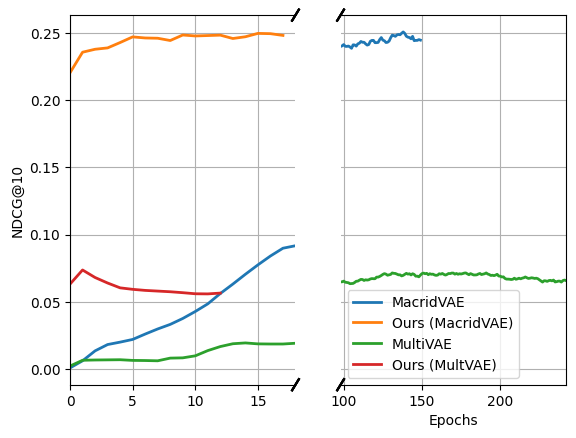

<Figure size 640x480 with 0 Axes>

In [176]:
x1, x2 = 18, 98

broken_axis_plot(stepdata, x1, x2, xlabel='NDCG@10', ylabel='Epochs', fname='epoch_performance')

MultiVAE
['g', 'r']
Ours (MultVAE)
['r']


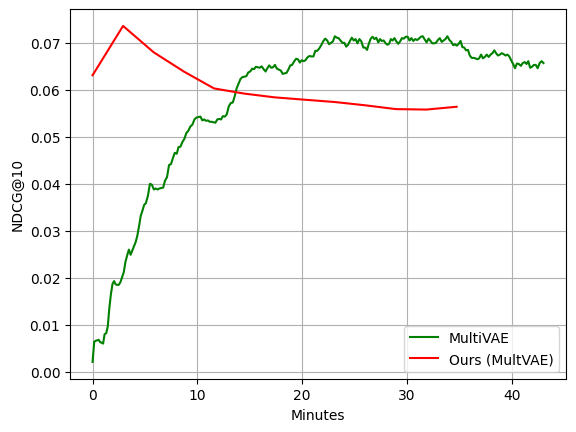

In [172]:
colors = ['g', 'r']
for model, xdata, ydata in mult_timedata:
    print(model)
    print(colors)
    plt.plot(xdata, ydata, color=colors[0],label=model)
    colors.pop(0)

plt.xlabel('Minutes')
plt.ylabel('NDCG@10')
plt.grid()
plt.legend()
plt.savefig(f'time_performance_mult.svg', format='svg', transparent=True)


/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_43664/983432903.py:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x = np.concatenate((xdata[:x1], xdata[x2:]))
/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_43664/983432903.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y = np.concatenate((ydata[:x1], ydata[x2:]))
/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_43664/983432903.py:24: UserWarning: Attempting to set identical low and high xl

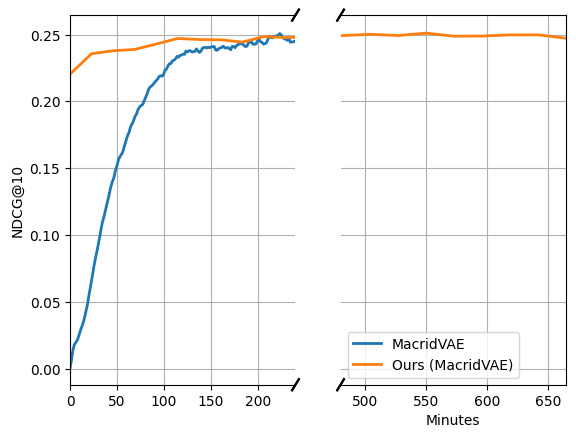

<Figure size 640x480 with 0 Axes>

In [182]:
broken_axis_plot(macrid_timedata, 240, 480, xlabel='NDCG@10', ylabel='Minutes', fname='time_performance_macrid')

/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_4866/3748853367.py:10: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y1 = np.concatenate((m_ndcg[:x1], m_ndcg[x2:]))
/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_4866/3748853367.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y2 = np.concatenate((md_ndcg[:x1], md_ndcg[x2:]))


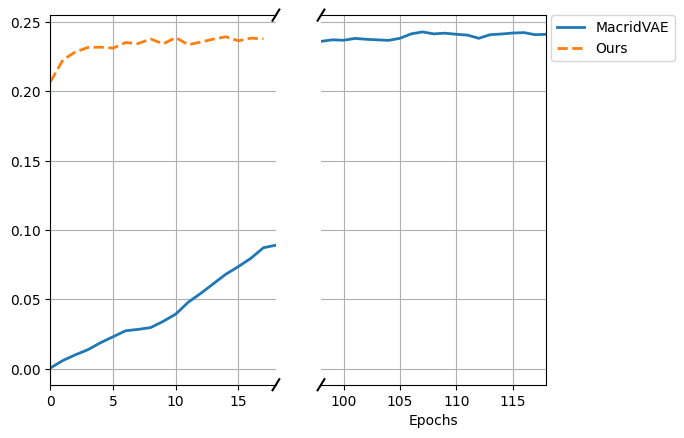

In [128]:
"""
Broken axis example, where the x-axis will have a portion cut out.
"""

x1, x2 = 18, 98

x_macrid = np.concatenate((m_step[:x1], m_step[x2:]))
x_macriddiff = np.concatenate((md_step[:x1], md_step[x2:]))

y1 = np.concatenate((m_ndcg[:x1], m_ndcg[x2:]))
y2 = np.concatenate((md_ndcg[:x1], md_ndcg[x2:]))

f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot(x_macrid, y1, linestyle='-', linewidth=2, label='MacridVAE')
ax.plot(x_macriddiff, y2, linestyle='--', linewidth=2, label='Ours')
ax2.plot(x_macrid, y1, linestyle='-', linewidth=2, label='MacridVAE')
ax2.plot(x_macriddiff, y2, linestyle='--', linewidth=2, label='Ours')


ax.set_xlim(0,x1)
ax2.set_xlim(x2, np.max(x_macrid))

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.yaxis.tick_left()
ax.tick_params(labelright=False)   # don't put tick labels at the top
ax2.yaxis.set_ticks_position('none')

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

f.subplots_adjust(hspace=0)

# Show legend, grid
ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

ax.grid()
ax2.grid()

# Set x label
ax2.set_xlabel('Epochs')

plt.show()

f.savefig('epoch_performance.svg', format='svg', transparent=True)

In [129]:
x1, x2 = 20, 100

x_macrid = np.concatenate((m_timestamp[:x1], m_timestamp[x2:]))
x_macriddiff = np.concatenate((md_timestamp[:x1], md_timestamp[x2:]))

y1 = np.concatenate((m_ndcg[:x1], m_ndcg[x2:]))
y2 = np.concatenate((md_ndcg[:x1], md_ndcg[x2:]))

x_macriddiff

/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_4866/1663670952.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x_macrid = np.concatenate((m_timestamp[:x1], m_timestamp[x2:]))
/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_4866/1663670952.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x_macriddiff = np.concatenate((md_timestamp[:x1], md_timestamp[x2:]))
/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_4866/1663670952.py:6: FutureWarning: 

array([0.        , 0.49329635, 0.98452968, 1.47489343, 1.97167675,
       2.46707217, 2.96310559, 3.45949394, 3.95660909, 4.45189317,
       4.94845389, 5.44806038, 5.94518243, 6.44155089, 6.93429748,
       7.42868782, 7.92314745, 8.41754812, 8.91105317, 9.4034426 ])

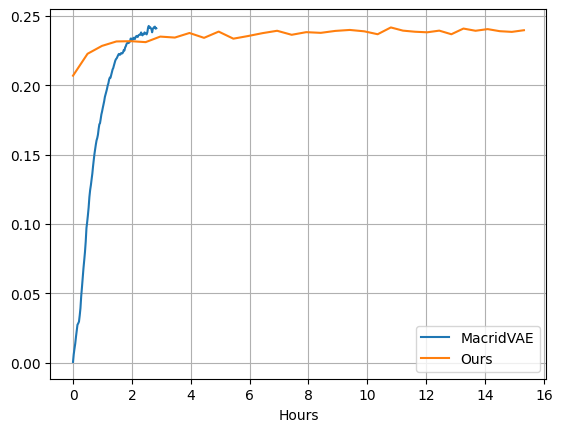

In [59]:
plt.plot(m_timestamp, m_ndcg, label='MacridVAE')
plt.plot(md_timestamp, md_ndcg, label='Ours')

plt.xlabel('Hours')

plt.legend()
plt.grid()

plt.savefig('time_performance.svg', format='svg', transparent=True)

/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_4866/1244836940.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x_macrid = np.concatenate((m_timestamp[:x1], m_timestamp[x2:]))
/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_4866/1244836940.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  x_macriddiff = np.concatenate((md_timestamp[:x1], md_timestamp[x2:]))
/var/folders/3b/cl8g_wbn7txby5hxcfcl5zwh0000gn/T/ipykernel_4866/1244836940.py:11: FutureWarning:

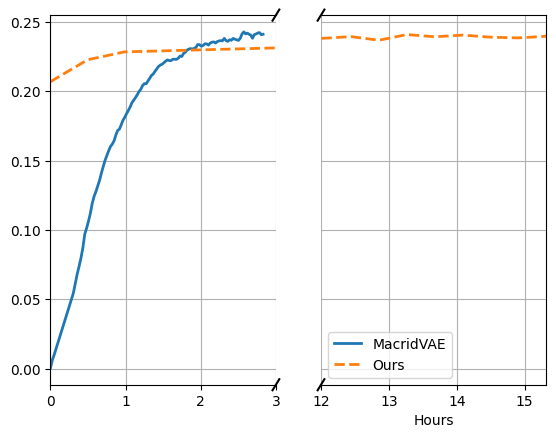

In [81]:
"""
Broken axis example, where the x-axis will have a portion cut out.
"""

x1, x2 = 3, 12

x_macrid = np.concatenate((m_timestamp[:x1], m_timestamp[x2:]))
x_macriddiff = np.concatenate((md_timestamp[:x1], md_timestamp[x2:]))


y1 = np.concatenate((m_ndcg[:x1], m_ndcg[x2:]))
y2 = np.concatenate((md_ndcg[:x1], md_ndcg[x2:]))

f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot(x_macrid, y1, linestyle='-', linewidth=2, label='MacridVAE')
ax.plot(x_macriddiff, y2, linestyle='--', linewidth=2, label='Ours')
ax2.plot(x_macrid, y1, linestyle='-', linewidth=2, label='MacridVAE')
ax2.plot(x_macriddiff, y2, linestyle='--', linewidth=2, label='Ours')

ax.set_xlim(0,x1)
ax2.set_xlim(x2, np.max(x_macriddiff))

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax.yaxis.tick_left()
ax2.yaxis.tick_left()
ax.tick_params(labelright=False)   # don't put tick labels at the top
ax2.yaxis.set_ticks_position('none')

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d,1+d), (-d,+d), **kwargs)
ax.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# Show legend, grid
ax2.legend()
ax.grid()
ax2.grid()

# Set x label
ax2.set_xlabel('Hours')

plt.show()

f.savefig('time_performance.svg', format='svg', transparent=True)

# Mode Analysis

In [21]:
mode_runs = []
ignored_models = ['BPR', 'LightGCN', 'MultiDAE']

for run in runs:
    if 'mode analysis' in run.tags:
        mode_runs += run,

mode_runs

[<Run msci_project/final_model_eval/9xejs7a0 (finished)>,
 <Run msci_project/final_model_eval/3svq3xw2 (finished)>,
 <Run msci_project/final_model_eval/2fs72r7i (finished)>,
 <Run msci_project/final_model_eval/2zv7glv0 (finished)>,
 <Run msci_project/final_model_eval/3hh3r4vw (finished)>]

Lyrics
Audio
Concatenation
Tensor Fusion


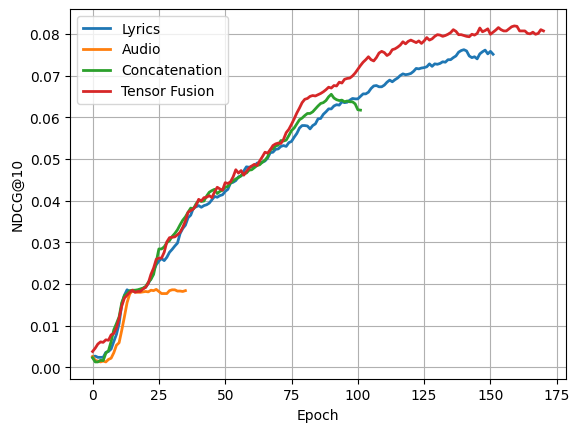

In [24]:
for run in mode_runs[:-1]:

    step, timestamp, ndcg = get_run_info(run.history())

    print(run.name)

    plt.plot(step, ndcg, linewidth=2, label=run.name)

plt.grid()
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('NDCG@10')

plt.savefig('mode_analysis.svg', format='svg', transparent=True)

    